In [13]:
from pyvesc import VESC
from time import sleep
from holonomic import *
import os

# Bichon
#serial_names = ['pci-0000:00:14.0-usb-0:7.4.3:1.0',
#                'pci-0000:00:14.0-usb-0:7.2:1.0',
#                'pci-0000:00:14.0-usb-0:7.3:1.0',
#                'pci-0000:00:14.0-usb-0:7.1:1.0']


#front_left = serial_names[1]
#front_right = serial_names[3]
#back_left = serial_names[2]
#back_right = serial_names[0]

# Poupette

serial_names = ['pci-0000:00:14.0-usb-0:5.1:1.0',
                'pci-0000:00:14.0-usb-0:5.2:1.0',
                'pci-0000:00:14.0-usb-0:5.3:1.0',
                'pci-0000:00:14.0-usb-0:5.4:1.0']

front_left = serial_names[1]
front_right = serial_names[3]
back_left = serial_names[2]
back_right = serial_names[0]

# vescs = /dev/serial/by-path/[vesc1, vesc2, vesc3, vesc4]
p="/dev/serial/by-path/"
vescs = [p+fn for fn in serial_names]
print(vescs)

motors = list()
for vesc in vescs:
    sleep(0.5)
    motors.append(VESC(serial_port=vesc))

front_left = motors[0]
front_right = motors[1]
rear_left = motors[2]
rear_right = motors[3]

['/dev/serial/by-path/pci-0000:00:14.0-usb-0:5.1:1.0', '/dev/serial/by-path/pci-0000:00:14.0-usb-0:5.2:1.0', '/dev/serial/by-path/pci-0000:00:14.0-usb-0:5.3:1.0', '/dev/serial/by-path/pci-0000:00:14.0-usb-0:5.4:1.0']


In [10]:
def set_duty_cycle(val):
    if val>0.5:
        val=0.5
    if val<-0.5:
        val=-0.5
    front_left.set_duty_cycle(val)

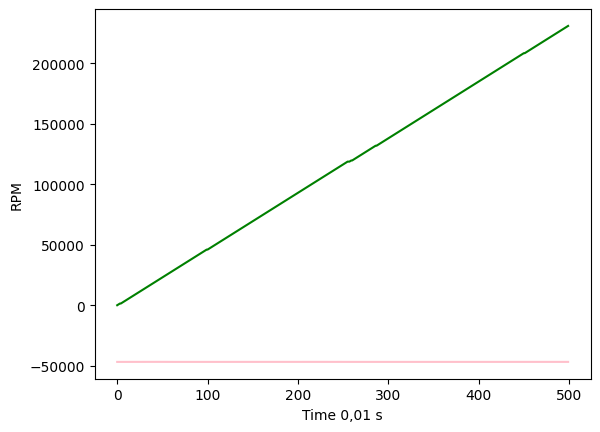

In [11]:
# SCRIPT BICHON
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

rpml = list()
duty_cycle_list = list()
rpmobj = 100
rcount = 0
current_duty_cycle = 0
k = 0.0001

def asserv(rpmobj, rpm, k):
    err = rpmobj - rpm
    delta = k * err
    return(delta)

for i in range(500) :

    try:
        rpm = -front_left.get_rpm()
        rpml.append(rpm)
        duty_cycle_list.append(current_duty_cycle*100)
    except AttributeError:
        rcount = rcount+1
        rpml.append(rpml[-1])
        duty_cycle_list.append(current_duty_cycle*100)
        continue

    current_duty_cycle = current_duty_cycle+asserv(rpmobj, rpm, k)  
    set_duty_cycle(current_duty_cycle)
    sleep(0.01)

set_duty_cycle(.0)

plt.plot(range(len(rpml)), rpml, '-', color='pink')
plt.plot(range(len(duty_cycle_list)), duty_cycle_list, '-', color='green')
plt.ylabel('RPM')
plt.xlabel('Time 0,01 s')

#print(rpml)
#print(duty_cycle_list)
plt.show()

Text(0.5, 0, 'Time 0,01 s')

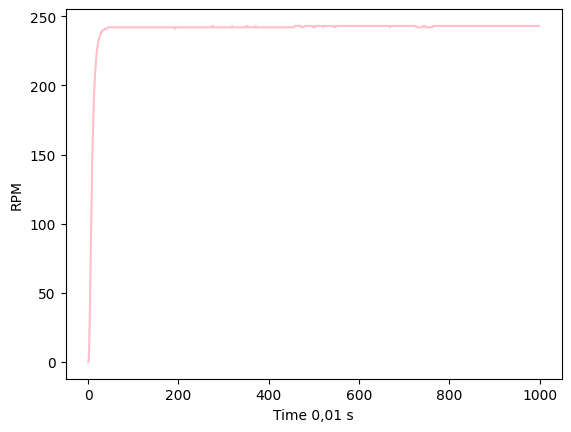

In [10]:
plt.plot(range(len(rpml)), rpml, '-', color='pink')
plt.ylabel('RPM')
plt.xlabel('Time 0,01 s')

In [12]:
set_duty_cycle(.0)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(100), rpml)
plt.ylabel('RPM')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (4,)

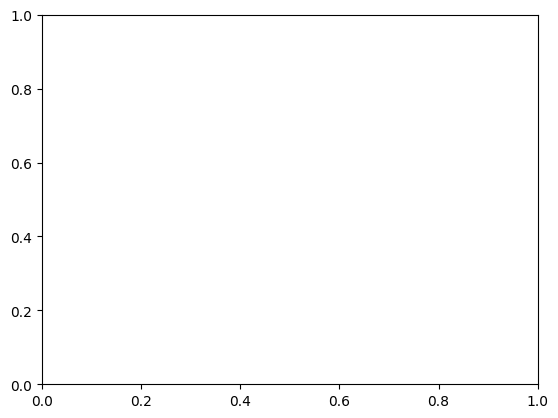

In [2]:
!pip install pyvesc

  Created wheel for pyvesc: filename=pyvesc-1.0.5-py3-none-any.whl size=8831 sha256=8366a875f23b23e91f53dd393260626b47afd75603f939fda910050c0a12109f
  Stored in directory: /home/armstone/.cache/pip/wheels/cc/41/f7/5e0a19bfd1d7f99e79d0a805aa7b85c61245a193908cebb718
Successfully built pyvesc


In [33]:
!pip install numpy

In [3]:
import socket
print(socket.gethostname())

ArmStone1


In [65]:
front_left.set_duty_cycle(0.0)

In [40]:
front_left.get_rpm()

8657.0

[-0.0, -0.0, -113.0, -331.0, -867.0, -1726.0, -3198.0, -5180.0, -7641.0, -10427.0, -13584.0, -16923.0, -20457.0, -24183.0, -27642.0, -30702.0, -33335.0, -35505.0, -37268.0, -38642.0, -39728.0, -40586.0, -41263.0, -41840.0, -42309.0, -42703.0, -43032.0, -43304.0, -43528.0, -43715.0, -43865.0, -44001.0, -44108.0, -44200.0, -44278.0, -44335.0, -44376.0, -44410.0, -44434.0, -44453.0, -44474.0, -44497.0, -44517.0, -44529.0, -44538.0, -44545.0, -44555.0, -44564.0, -44567.0, -44568.0, -44569.0, -44571.0, -44577.0, -44589.0, -44596.0, -44600.0, -44600.0, -44595.0, -44587.0, -44584.0, -44578.0, -44572.0, -44573.0, -44578.0, -44584.0, -44590.0, -44599.0, -44602.0, -44604.0, -44602.0, -44601.0, -44601.0, -44604.0, -44604.0, -44605.0, -44606.0, -44607.0, -44607.0, -44607.0, -44610.0, -44610.0, -44612.0, -44607.0, -44602.0, -44599.0, -44592.0, -44587.0, -44583.0, -44586.0, -44589.0, -44590.0, -44592.0, -44594.0, -44593.0, -44593.0, -44600.0, -44608.0, -44622.0, -44624.0, -44623.0, -44615.0, -44606.

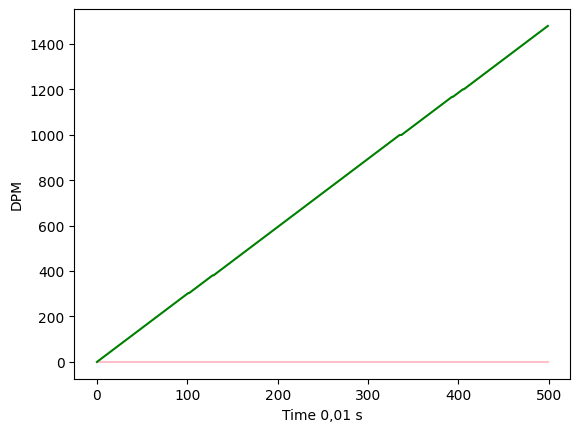

In [63]:
# SCRIPT POUPETTE
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

dpml = list()
duty_cycle_list = list()
dpmobj = 30000
rcount = 0
current_duty_cycle = 0
k = 1/1000000

def asserv(dpmobj, dpm, k):
    err = dpmobj - dpm
    delta = k * err
    return(delta)

for i in range(500) :

    try:
        dpm = rear_left.get_rpm()
        dpml.append(dpm)
        duty_cycle_list.append(current_duty_cycle*100)
    except AttributeError:
        rcount = rcount+1
        dpml.append(dpml[-1])
        duty_cycle_list.append(current_duty_cycle*100)
        continue

    current_duty_cycle = current_duty_cycle+asserv(dpmobj, dpm, k)  
    set_duty_cycle(current_duty_cycle)
    sleep(0.01)

set_duty_cycle(.0)

plt.plot(range(len(rpml)), dpml, '-', color='pink')
plt.plot(range(len(duty_cycle_list)), duty_cycle_list, '-', color='green')
plt.ylabel('DPM')
plt.xlabel('Time 0,01 s')

print(rpml)
print(duty_cycle_list)
plt.show()